### === Task ===

1. With the iris data given in class, implement train_test_split from scratch.

2. Put everything into a class called LogisticRegression, this class should allow you choose any of the training methods you'd like including "batch", "minibatch" and "sto". However, if the input method is not one of the three, it should "raise ValueError".

3. Calculate time taken to fit your models using different training methods.

4. Perform a classification on the dataset using all 3 methods and also show what happens if your defined training method is not either "batch", "minibatch" or "sto". Make sure to plot the training losses.

5. Simply, use classification_report from sklearn.metrics to evaluate your models.

6. Discuss your results ie. training losses of the three methods and time taken to fit models.

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import time

# Step 1 : Prepare data
iris = datasets.load_iris()           
X = iris.data[:, 2:]  
y = iris.target  

# Feature scaling 
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Add intercept                                                         
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1) 

# y is in the shape of (m, k)
k = len(set(y))  # no. of class  
    #(len(np.unique(y)))
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no.of features

Y_train_encoded = np.zeros((m, k)) 

for each_class in range(k):
    cond = y_train==each_class
    Y_train_encoded[np.where(cond), each_class] = 1

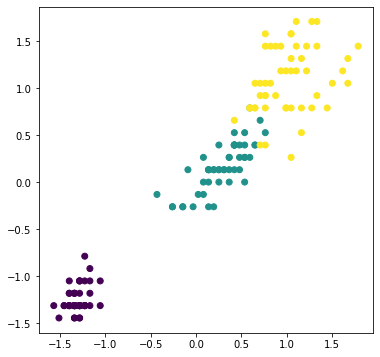

In [2]:
#(op) Visualize the data's distribution : separate well or not

plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, label='class 0')
plt.show()

In [8]:
# Step 2 : Fit data

class LogisticRegression :
    
    def __init__(self, k, n, method, alpha = 0.001, max_iter=10000):
        self.k = k
        self.n = n
        self.alpha = alpha                          
        self.max_iter = max_iter
        self.method = method
    
    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)    
                 #(np.zeros((self.n, self.k)))          
                 #np.ones((self.n, self.k))
        self.losses = []             
        
        if self.method == "batch":
            start_time = time.time()                        
            for i in range(self.max_iter):
                cost, grad =  self.gradient(X, Y)           
                self.losses.append(cost)
                self.W = self.W - self.alpha * grad             
                if i % 500 == 0:                                   # not print all coz too long
                    print(f"Cost at iteration {i}", cost)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.5 * X.shape[0]) 
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0])              # with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                cost, grad = self.gradient(batch_X, batch_Y)       
                self.losses.append(cost)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Cost at iteration {i}", cost)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            for i in range(self.max_iter):
                list_of_used_ix = []                      
                idx = np.random.randint(X.shape[0])
                
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)                
                Y_train = Y[idx]
                cost, grad = self.gradient(X_train, Y_train)
                self.losses.append(cost)
                self.W = self.W - self.alpha * grad
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                    
                if i % 500 == 0:
                    print(f"Cost at iteration {i}", cost)
            print(f"time taken: {time.time() - start_time}")
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')

    
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)                  #h_theta นางคือ softmax(X @ W)
        cost = - np.sum(Y*np.log(h)) / m            
        error = h - Y
        grad = self.softmax_grad(X, error)
        return cost, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)            

    def softmax_grad(self, X, error):
        return  X.T @ error                    

    def h_theta(self, X, W):
        return self.softmax(X @ W)
    
# step 3 : Predict
    def predict(self, X_test):                        
        return np.argmax(self.h_theta(X_test, self.W), axis=1)        
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("Epoch")
        plt.ylabel("Losses")
        plt.legend()

Cost at iteration 0 1.6174855294614363
Cost at iteration 500 0.1639133733220364
Cost at iteration 1000 0.11890942372762782
Cost at iteration 1500 0.10073580009862391
Cost at iteration 2000 0.09041973150345135
Cost at iteration 2500 0.08354987935404572
Cost at iteration 3000 0.0785338653663876
Cost at iteration 3500 0.07464880524749794
Cost at iteration 4000 0.07151539472087579
Cost at iteration 4500 0.06891338095016676
Cost at iteration 5000 0.06670484369449789
Cost at iteration 5500 0.06479822076546153
Cost at iteration 6000 0.06312983659858092
Cost at iteration 6500 0.06165371427216379
Cost at iteration 7000 0.060335618621572044
Cost at iteration 7500 0.059149399214157294
Cost at iteration 8000 0.05807465019371443
Cost at iteration 8500 0.05709515839920089
Cost at iteration 9000 0.056197841877668034
Cost at iteration 9500 0.055372003961489336
time taken: 0.6391687393188477

=========Classification report=======
Report:                precision    recall  f1-score   support

         

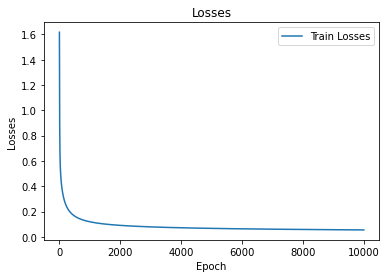

In [10]:
# Try the model
# Batch

model = LogisticRegression(k, X_train.shape[1], "batch")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()

print()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

Cost at iteration 0 0.9967577322237853
Cost at iteration 500 0.28402565821119136
Cost at iteration 1000 0.17055748217628894
Cost at iteration 1500 0.16516147265199652
Cost at iteration 2000 0.12791400602212785
Cost at iteration 2500 0.12666190918872755
Cost at iteration 3000 0.08125472774896707
Cost at iteration 3500 0.11260099333572016
Cost at iteration 4000 0.04952242439747518
Cost at iteration 4500 0.10923967322236379
Cost at iteration 5000 0.10780055249157271
Cost at iteration 5500 0.047190349624773885
Cost at iteration 6000 0.08572896356259586
Cost at iteration 6500 0.08542815377235226
Cost at iteration 7000 0.10058803061890756
Cost at iteration 7500 0.07769077307487618
Cost at iteration 8000 0.07770307039060374
Cost at iteration 8500 0.0836544291060811
Cost at iteration 9000 0.08496036645098502
Cost at iteration 9500 0.05979043582082139
time taken: 0.6152670383453369

=========Classification report=======
Report:                precision    recall  f1-score   support

           

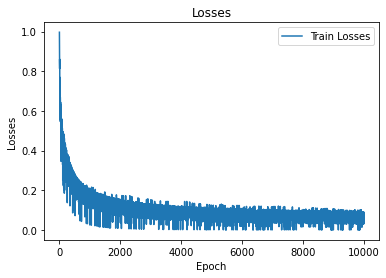

In [9]:
# Minibatch
model = LogisticRegression(k, X_train.shape[1], "minibatch")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()

print()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))    # swing more than batch but batch takes more time

Cost at iteration 0 2.066959535648974
Cost at iteration 500 1.446067396556152
Cost at iteration 1000 0.9337209818197224
Cost at iteration 1500 0.32442145860775
Cost at iteration 2000 0.4954666014234553
Cost at iteration 2500 0.6711642814633625
Cost at iteration 3000 0.5466034695478044
Cost at iteration 3500 0.1598614504908087
Cost at iteration 4000 0.1650764385447114
Cost at iteration 4500 0.1628603858689469
Cost at iteration 5000 0.8792434702784523
Cost at iteration 5500 0.8986270431461163
Cost at iteration 6000 0.13825510150968276
Cost at iteration 6500 0.8679195859850072
Cost at iteration 7000 0.8470638589570955
Cost at iteration 7500 0.1869065728784159
Cost at iteration 8000 0.10987997708016775
Cost at iteration 8500 0.30093963734523577
Cost at iteration 9000 0.40123916941780696
Cost at iteration 9500 0.10739928994915801
time taken: 0.4962456226348877

=========Classification report=======
Report:                precision    recall  f1-score   support

           0       1.00      

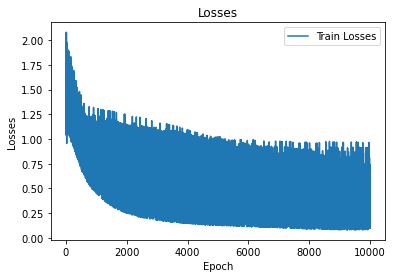

In [6]:
# Stochastic
model = LogisticRegression(k, X_train.shape[1], "sto")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()

print()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

In [7]:
# else method
model = LogisticRegression(k, X_train.shape[1], "I am not batch")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()

print()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

ValueError: Method must be one of the followings: "batch", "minibatch" or "sto".